In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [3]:
# read the dataset 
data = pd.read_csv( './Dataset/diabetes.csv' )

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
## Check for null values in the dataset 

data.isnull().sum()

Pregnancies                  0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
dtype: int64

In [6]:
## Here we observe that their is No NaN values 

In [7]:
data.columns = data.columns.str.strip()

In [8]:
## Here we are going to replace the 0 values with mean 

data['BMI'] = data['BMI'].replace( 0, data['BMI'].mean() )
data['BloodPressure'] = data['BloodPressure'].replace( 0, data['BloodPressure'].mean() )
data['Glucose'] = data['Glucose'].replace( 0, data['Glucose'].mean() )
data['Insulin'] = data['Insulin'].replace( 0, data['Insulin'].mean() )
data['SkinThickness'] = data['SkinThickness'].replace( 0, data['SkinThickness'].mean() )


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

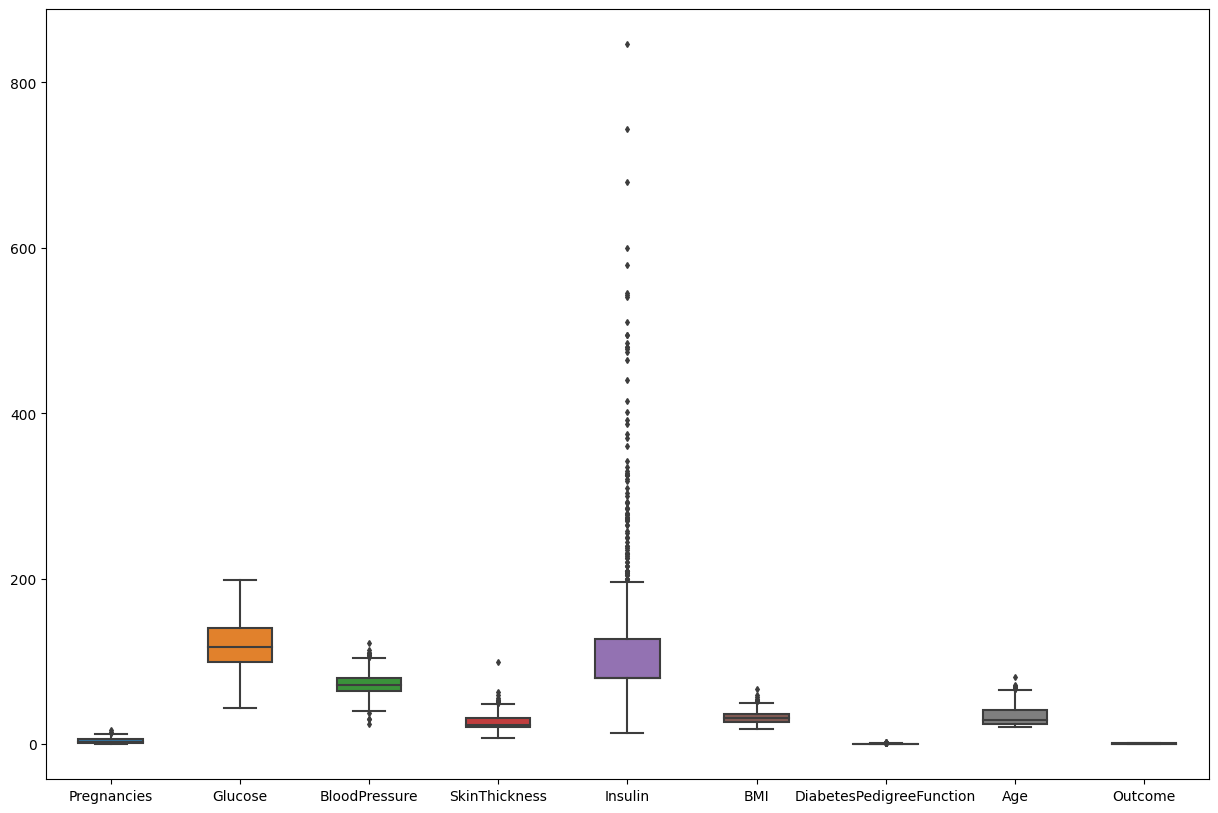

In [10]:
## now we check for box plot for checking outliers 

fig, ax = plt.subplots( figsize=(15, 10) )
sns.boxplot( data = data, width=0.5, ax=ax, fliersize=3 )

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [12]:
### Divide the dataset into independent and dependent variables 

X = data.drop( 'Outcome', axis=1 )
y = data['Outcome']

In [13]:
### Split the data into train and test datasets 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 0 )

X_train.shape, X_test.shape

((576, 8), (192, 8))

In [14]:
### Standard Scaling --- Standardization

def scaler_standard(X_train, X_test):
    # scaling the data 
    scaler = StandardScaler()
    X_train_scaled =  scaler.fit_transform( X_train )
    X_test_scaled  = scaler.transform( X_test )

    ## save the model in a pickle file 
    file = open( 'standardScaler.pkl', 'wb' )
    pickle.dump( scaler, file )
    file.close()

    return X_train_scaled, X_test_scaled


In [15]:
## Now perform Standardization on this data 

X_train_scaled, X_test_scaled = scaler_standard( X_train, X_test )

<Axes: >

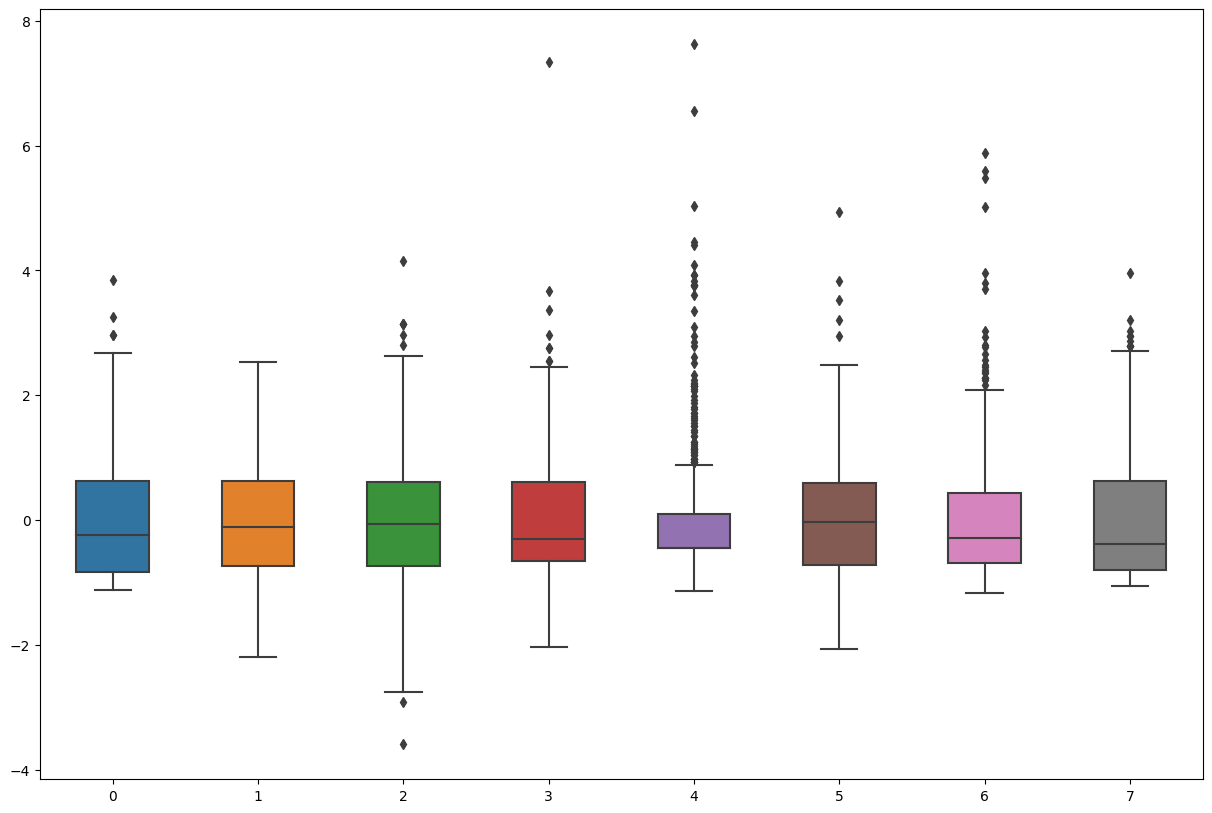

In [16]:
fig, ax = plt.subplots( figsize=(15, 10) )
sns.boxplot( data=X_train_scaled, width=0.5 , fliersize=5, ax = ax )

#### Training Model ( Logistic Regression )

In [19]:
## Train our model 

log_reg = LogisticRegression()
log_reg.fit( X_train_scaled, y_train )

LogisticRegression()

- Logistic regression model is created without any parameters

In [21]:
## Hyperparameter Tunning 

from sklearn.model_selection import GridSearchCV 
import warnings 
warnings.filterwarnings("ignore")

## Parameter grid 
parameter = {
    'penalty': ['l1', 'l2', 'elasticnet', None ],
    'C': np.logspace(-3, 3, 7),
    'solver': [ 'newton-cg', 'lbfgs', 'liblinear' ]
}

In [24]:
logreg = LogisticRegression()

clf = GridSearchCV( logreg, param_grid=parameter, cv=10, scoring='accuracy' )

clf.fit( X_train_scaled, y_train )

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [25]:
clf.best_score_

0.763793103448276

In [26]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [33]:
log_reg = LogisticRegression( C=1, penalty='l2', solver='liblinear' )

log_reg.fit( X_train_scaled, y_train )

LogisticRegression(C=1, solver='liblinear')

In [34]:
### Either we again make a new LogisticRegression model or predict with this classifier

y_pred = log_reg.predict( X_test_scaled )

In [35]:
### Now we are finding the confusion matrix, accuracy score 

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("******************************************* Accuracy Score ********************************")
print( accuracy_score( y_test, y_pred ) )
print("******************************************* Classification Report ********************************")
print( classification_report( y_test, y_pred) )
print("******************************************* Confusion Matrix ********************************")
print( confusion_matrix( y_test, y_pred) )

******************************************* Accuracy Score ********************************
0.796875
******************************************* Classification Report ********************************
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

******************************************* Confusion Matrix ********************************
[[117  13]
 [ 26  36]]


#### Observations 

- Accuracy of the model is nearly 80 %.

In [30]:
### Getting some observations from the confusion matrix

matrix = confusion_matrix( y_test, y_pred )

tp = matrix[ 0 ][ 0 ]
fp = matrix[ 0 ][ 1 ]
fn = matrix[ 1 ][ 0 ]
tn = matrix[ 1 ][ 1 ]

print("********************************************** Accuracy ***************************")
accuracy = ( tp + tn ) / ( tp + fp + fn + tn )
print( accuracy )
print("********************************************** Precision ********************************")
precision = tp / ( tp + fp )
print( precision )
print("********************************************** Recall ********************************")
recall = tp / ( tp + fn )
print( recall )

********************************************** Accuracy ***************************
0.796875
********************************************** Precision ********************************
0.9
********************************************** Recall ********************************
0.8181818181818182


In [31]:
### Model accuracy sounds good store in pickle file 

import pickle

file = open( "model_for_pred.pkl", 'wb' )
pickle.dump( log_reg, file )
file.close()